# Spline Basis Representations using ```mgcv``` and ```elasdics```

In [43]:
library(mgcv)
library(splines)

In ```elasdics``` :

In [44]:
make_design <- function (t, knots, closed = FALSE, type = "smooth") 
{
    deg <- ifelse(type == "smooth", 1, 0)
    design_mat <- splineDesign(
        knots = c(rep(0, deg), knots, rep(1, deg)),
        x = t, 
        outer.ok = TRUE, 
        ord = deg + 1
    )
    if (closed == TRUE & type == "smooth") {
        design_mat[, 1] <- design_mat[, 1] + design_mat[, ncol(design_mat)]
        design_mat <- design_mat[, -ncol(design_mat)]
    }
    design_mat
}

In [56]:
t = as.vector(c(0.01217853, 0.04774175, 0.10410260, 0.17569727, 0.26225496, 
      0.36307036, 0.48222851, 0.61656147, 0.75608383, 0.91377757))
knots = seq(0,1, length = 11)

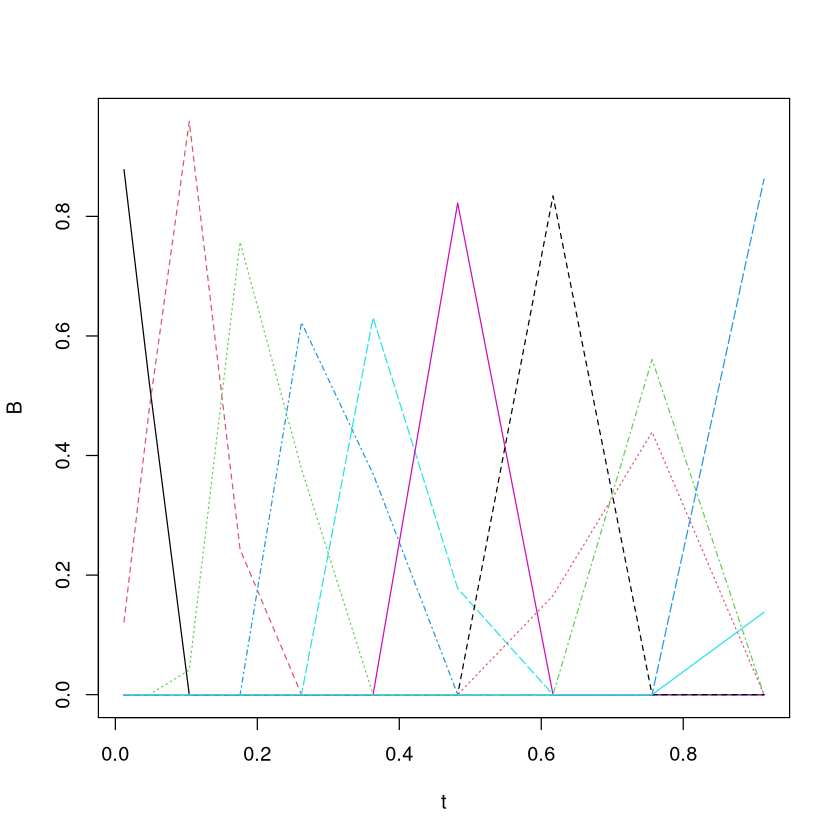

In [63]:
B = make_design(t, knots, closed = FALSE, type="smooth")
matplot(t, B, t = "l")

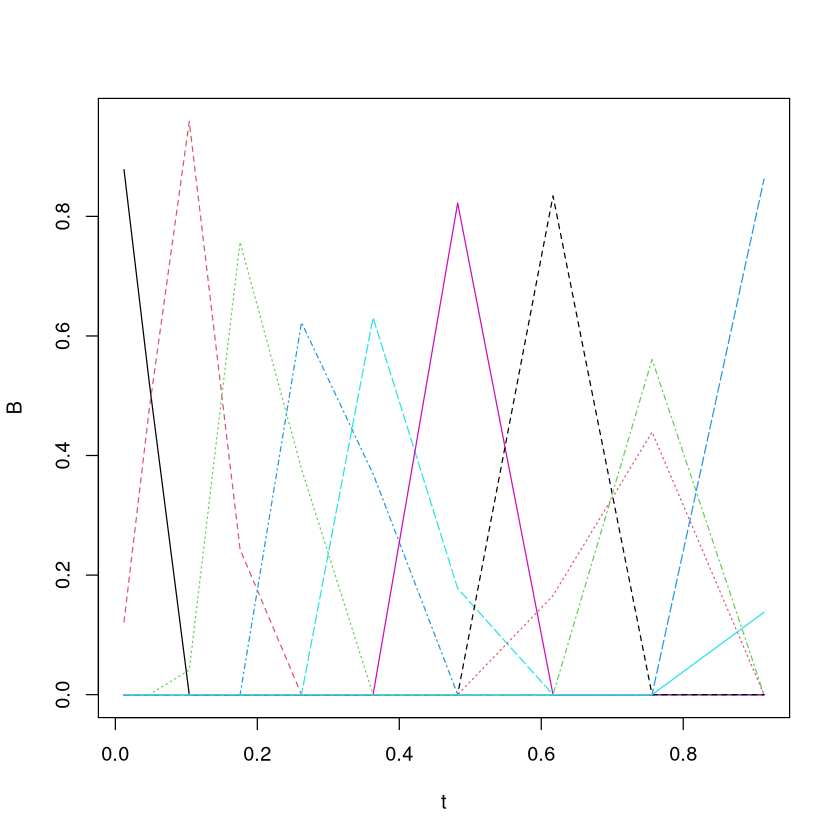

In [170]:
B <- spline.des(knots=c(0,knots,1),t,ord=2,outer.ok=TRUE)$design
matplot(t,B,t="l")

## Almond Mail: Beispiel

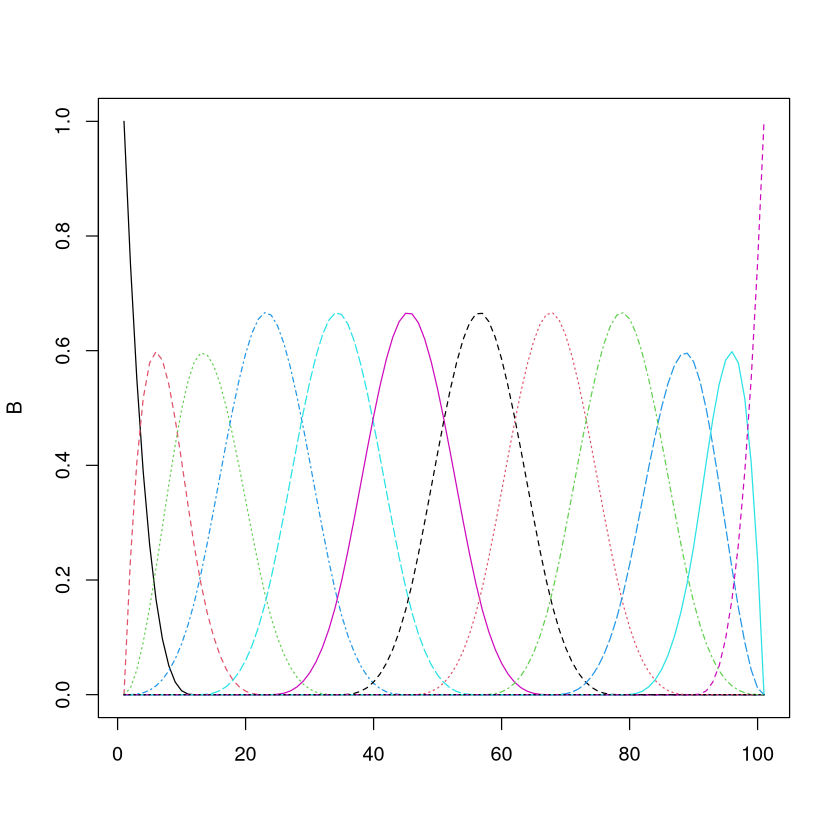

In [26]:
B <- splines::bs(knots = seq(0, 100, len = 10), x=0:100)
matplot(B, t="l")

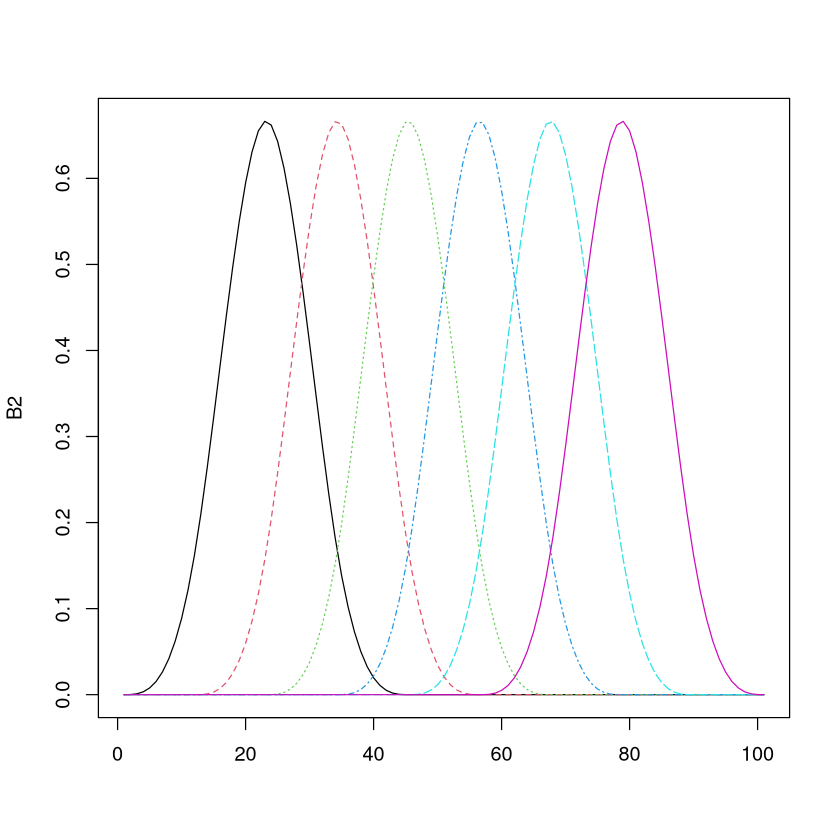

In [30]:
B2 <- splines::splineDesign(knots = seq(0,100, len = 10), x = 0:100, outer.ok=TRUE)
matplot(B2, t="l")

In ```mgcv```:

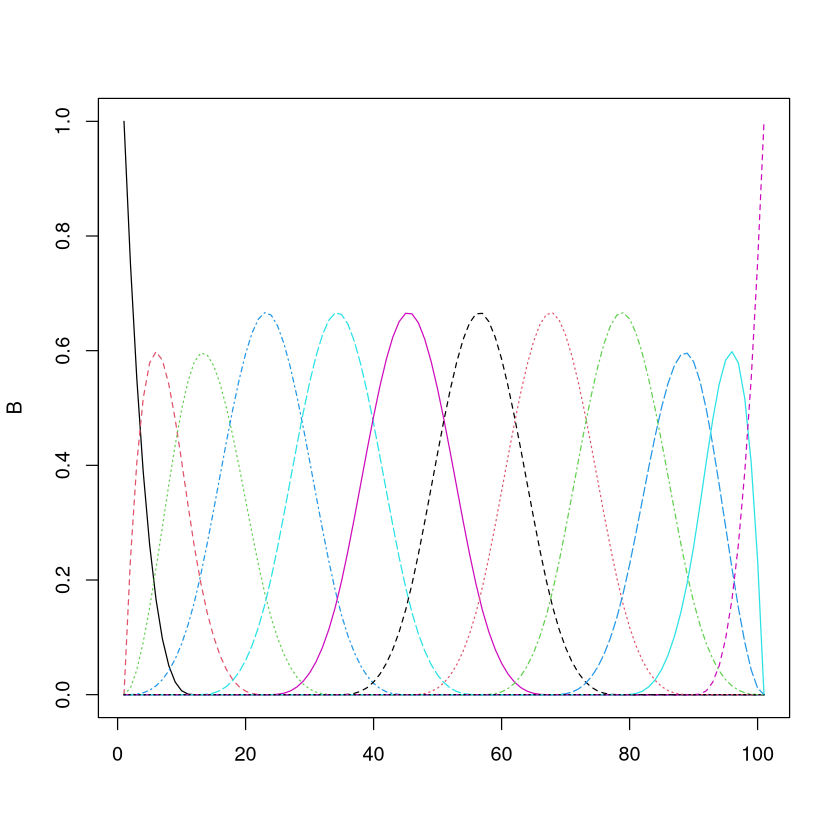

In [73]:
B <- splines::bs(knots = seq(0, 100, len=10),
                x = 0:100)
matplot(B, t = "l")

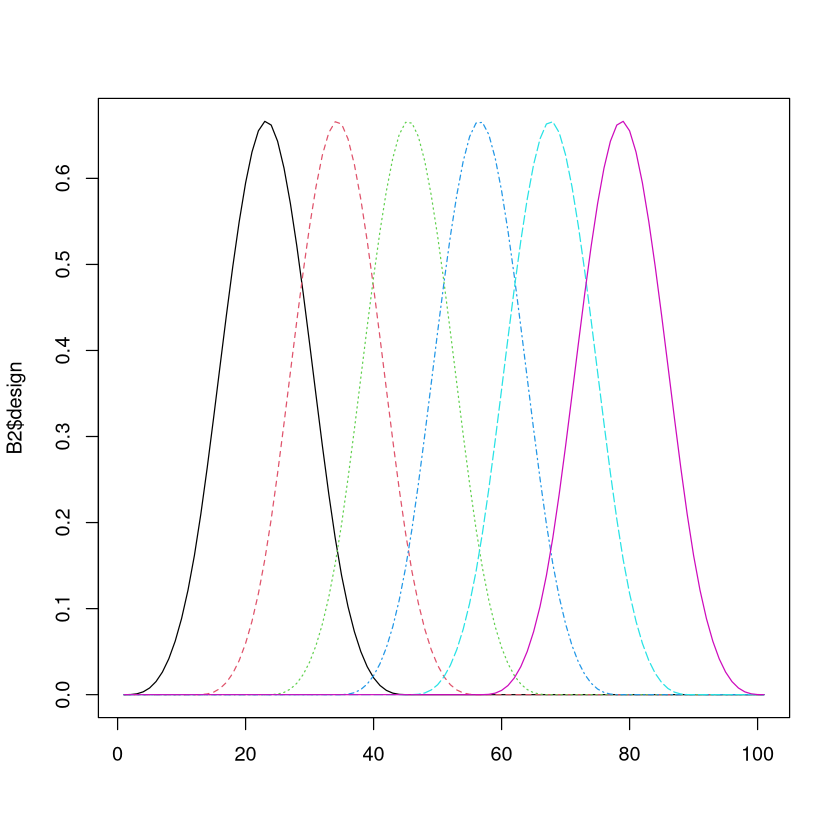

In [70]:
B2 <- splines::spline.des(knots = seq(0, 100, len = 10),
                          x = 0:100, outer.ok = TRUE)
matplot(B2$design, t = "l")

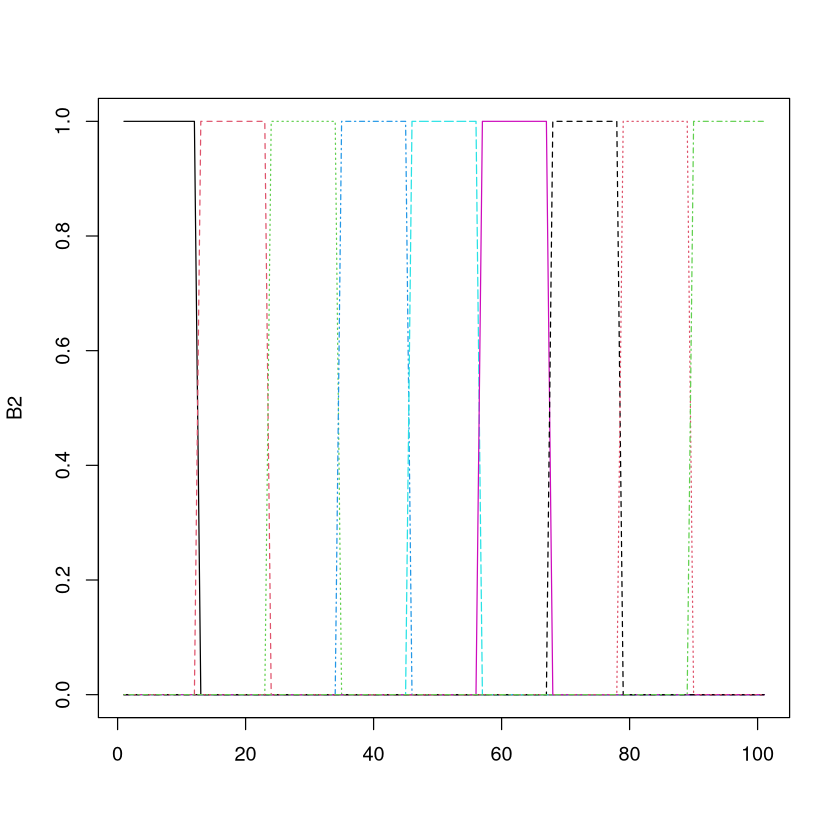

In [35]:
knots = seq(0, 100, len = 10)
deg=0
B2 <- splines::splineDesign(
        knots = c(rep(0, deg), knots, rep(1, deg)),
        x = 0:100, 
        outer.ok = TRUE, 
        ord = deg + 1
    )
matplot(B2, t = "l")

In [156]:
?smooth.construct.ps.smooth.spec

smooth.construct.ps.smooth.spec {mgcv},R Documentation
object,"a smooth specification object, usually generated by a term s(x,bs=""ps"",...) or s(x,bs=""cp"",...)"
data,"a list containing just the data (including any by variable) required by this term, with names corresponding to object$term (and object$by). The by variable is the last element."
knots,a list containing any knots supplied for basis setup — in same order and with same names as data. Can be NULL. See details for further information.


In [151]:
shapeboost:::smooth.construct.sps.smooth.spec

function (object, data, knots) 
{
    if (length(object$term) > 2) 
        stop("basis only handels 1D and 2D smooths")
    if (is.null(object$xt)) 
        object$xt <- list(skew = FALSE, cyclic = FALSE)
    if (is.null(object$xt$skew)) 
        object$xt$skew <- FALSE
    if (is.null(object$xt$cyclic)) 
        object$xt$cyclic <- FALSE
    if (is.null(object$xt$bsmargin)) 
        object$xt$bsmargin <- "ps"
    if (length(object$term) == 1) {
        if (object$xt$cyclic) 
            warning("Only 2D splines can be cross-cyclic.\n              Hence, cyclic = TRUE is ignored.\n              You might want to specify bsmargin = 'cp' instead\n              to get cyclic B-splines.")
        object <- smooth.construct(eval(as.call(list(as.symbol("s"), 
            as.symbol(object$term[1]), bs = object$xt$bsmargin, 
            pc = object$point.con, xt = object$xt, k = object$bs.dim, 
            m = object$p.order))), data = data, knots = knots)
        if (object$xt$skew) {
            bs.dim <- floor(object$bs.dim/2)
            Z <- rbind(diag(nrow = bs.dim), if (object$bs.dim%%2) 
                0, -diag(nrow = bs.dim)[, bs.dim:1])
        }
        else {
            bs.dim <- ceiling(object$bs.dim/2)
            Z <- rbind(diag(nrow = bs.dim), diag(nrow = bs.dim)[, 
                bs.dim:1])
            if (object$bs.dim%%2) 
                Z <- Z[-bs.dim, ]
        }
        S <- object$S[[1]]
    }
    if (length(object$term) == 2) {
        x <- data[[object$term[1]]]
        y <- data[[object$term[2]]]
        if (length(unique(x)) < object$bs.dim) 
            warning("basis dimension is larger than number of unique covariates")
        if (is.null(object$xt$kroneckersum)) 
            object$xt$kroneckersum <- TRUE
        if (!all(sapply(object$xt$bsmargin, "%in%", c("ps", "cp")))) 
            stop("marginal smooth classes need to be 'ps' or 'cp'.")
        if (length(object$xt$bsmargin) == 1) 
            object$xt$bsmargin <- rep(object$xt$bsmargin, 2)
        if (length(object$p.order) == 1) {
            m <- rep(object$p.order, 2)
        }
        else {
            m <- object$p.order
        }
        m[is.na(m)] <- 2
        object$p.order <- m
        if (object$bs.dim < 0) 
            object$bs.dim <- max(10, m[1])
        nk <- object$bs.dim - m[1]
        if (nk <= 0) 
            stop("basis dimension too small for b-spline order")
        k1 <- if (is.null(knots[[object$term[1]]])) 
            knots[[object$term[2]]]
        else knots[[object$term[1]]]
        k2 <- knots[[object$term[2]]]
        if (!is.null(k2)) {
            if (!identical(k1, k2)) 
                stop("number of specified knots is not equal for both margins")
        }
        if (is.null(k1)) 
            k1 <- range(data[object$term])
        object$knots <- list(k1, k1)
        names(object$knots) <- object$term
        Sm <- list()
        smooth1 <- smooth.construct(eval(as.call(list(as.symbol("s"), 
            as.symbol(object$term[1]), bs = object$xt$bsmargin[1], 
            k = object$bs.dim, m = object$p.order))), data = data, 
            knots = object$knots[object$term[1]])
        smooth2 <- smooth.construct(eval(as.call(list(as.symbol("s"), 
            as.symbol(object$term[2]), bs = object$xt$bsmargin[2], 
            k = object$bs.dim, m = object$p.order))), data = data, 
            knots = object$knots[object$term[2]])
        object$X <- tensor.prod.model.matrix(X = list(smooth1$X, 
            smooth2$X))
        Sm[[1]] <- smooth1$S[[1]]
        Sm[[2]] <- smooth2$S[[1]]
        if (object$xt$kroneckersum) {
            S <- tensor.prod.penalties(list(Sm[[1]], Sm[[2]]))
            S <- S[[1]] + S[[2]]
        }
        else {
            S <- Sm[[1]] %x% Sm[[2]]
        }
        Z <- make_summation_matrix(F = object$bs.dim, skew = object$xt$skew, 
            cyclic.degree = object$xt$cyclic * (m[1] + 1))
        object$margin < list()
        object$margin[[1]] <- smooth1
        object$ma

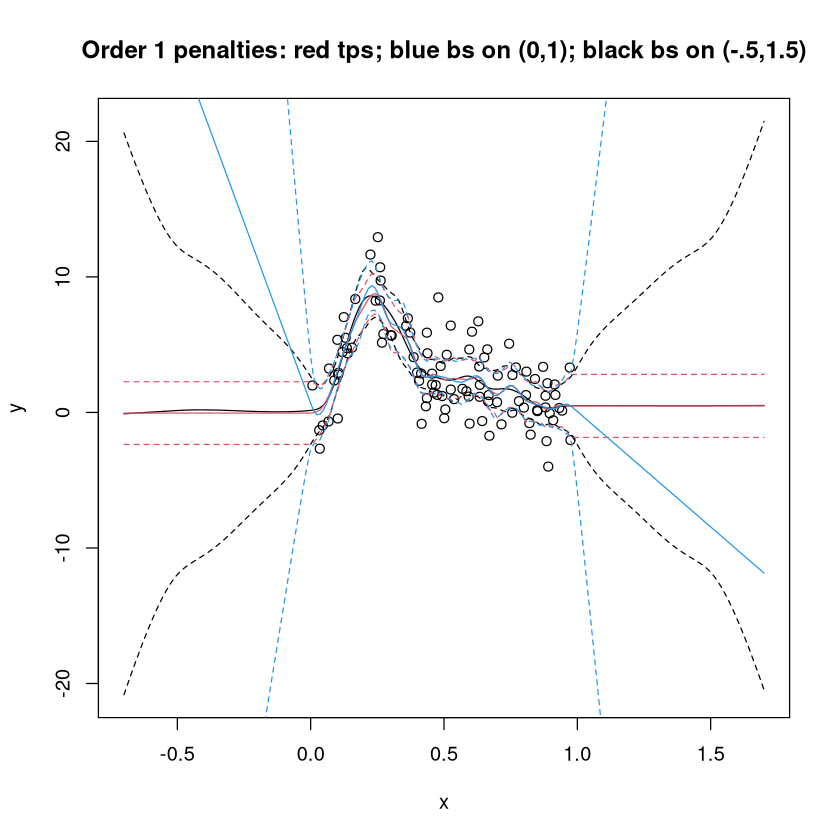

In [153]:
## Extrapolation example, illustrating the importance of considering
## the penalty carefully if extrapolating...
f3 <- function(x) 0.2 * x^11 * (10 * (1 - x))^6 + 10 * (10 * x)^3 * 
          (1 - x)^10 ## test function
n <- 100;x <- runif(n)
y <- f3(x) + rnorm(n)*2
## first a model with first order penalty over whole real line (red)
b0 <- gam(y~s(x,m=1,k=20),method="ML")
## now a model with first order penalty evaluated over (-.5,1.5) (black)
op <- options(warn=-1)
b <- gam(y~s(x,bs="bs",m=c(3,1),k=20),knots=list(x=c(-.5,0,1,1.5)),
       method="ML")
options(op)
## and the equivalent with same penalty over data range only (blue)
b1 <- gam(y~s(x,bs="bs",m=c(3,1),k=20),method="ML")
pd <- data.frame(x=seq(-.7,1.7,length=200))
fv <- predict(b,pd,se=TRUE)
ul <- fv$fit + fv$se.fit*2; ll <- fv$fit - fv$se.fit*2
plot(x,y,xlim=c(-.7,1.7),ylim=range(c(y,ll,ul)),main="Order 1 penalties: red tps; blue bs on (0,1); black bs on (-.5,1.5)")
## penalty defined on (-.5,1.5) gives plausible predictions and intervals
## over this range...
lines(pd$x,fv$fit);lines(pd$x,ul,lty=2);lines(pd$x,ll,lty=2)
fv <- predict(b0,pd,se=TRUE)
ul <- fv$fit + fv$se.fit*2; ll <- fv$fit - fv$se.fit*2
## penalty defined on whole real line gives constant width intervals away
## from data, as slope there must be zero, to avoid infinite penalty:
lines(pd$x,fv$fit,col=2)
lines(pd$x,ul,lty=2,col=2);lines(pd$x,ll,lty=2,col=2)
fv <- predict(b1,pd,se=TRUE)
ul <- fv$fit + fv$se.fit*2; ll <- fv$fit - fv$se.fit*2
## penalty defined only over the data interval (0,1) gives wild and wide
## extrapolation since penalty has been `turned off' outside data range:
lines(pd$x,fv$fit,col=4)
lines(pd$x,ul,lty=2,col=4);lines(pd$x,ll,lty=2,col=4)

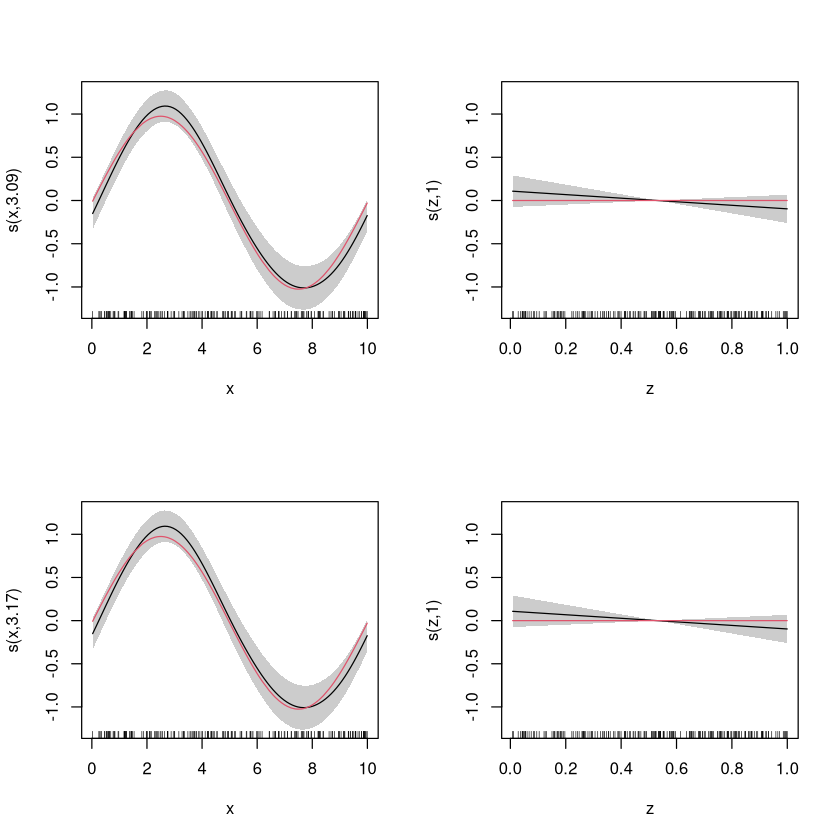

In [157]:
## see ?gam
## cyclic example ...
require(mgcv)
set.seed(6)
x <- sort(runif(200)*10)
z <- runif(200)
f <- sin(x*2*pi/10)+.5
y <- rpois(exp(f),exp(f)) 

## finished simulating data, now fit model...
b <- gam(y ~ s(x,bs="cp") + s(z,bs="ps"),family=poisson)

## example with supplied knot ranges for x and z (can do just one)
b <- gam(y ~ s(x,bs="cp") + s(z,bs="ps"),family=poisson,
       knots=list(x=c(0,10),z=c(0,1))) 

## example with supplied knots...
bk <- gam(y ~ s(x,bs="cp",k=12) + s(z,bs="ps",k=13),family=poisson,
                  knots=list(x=seq(0,10,length=13),z=(-3):13/10))

## plot results...
par(mfrow=c(2,2))
plot(b,select=1,shade=TRUE);lines(x,f-mean(f),col=2)
plot(b,select=2,shade=TRUE);lines(z,0*z,col=2)
plot(bk,select=1,shade=TRUE);lines(x,f-mean(f),col=2)
plot(bk,select=2,shade=TRUE);lines(z,0*z,col=2)


In [16]:
?sparseFLMM::smooth.construct.symm.smooth.spec

smooth.construct.symm.smooth.spec {sparseFLMM},R Documentation
object,is a smooth specification object or a smooth object.
data,"a data frame, model frame or list containing the values of the (named) covariates at which the smooth term is to be evaluated."
knots,an optional data frame supplying any knot locations to be supplied for basis construction.


In [18]:
library(sparseFLMM)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-33. For overview type 'help("mgcv-package")'.

Loading required package: refund



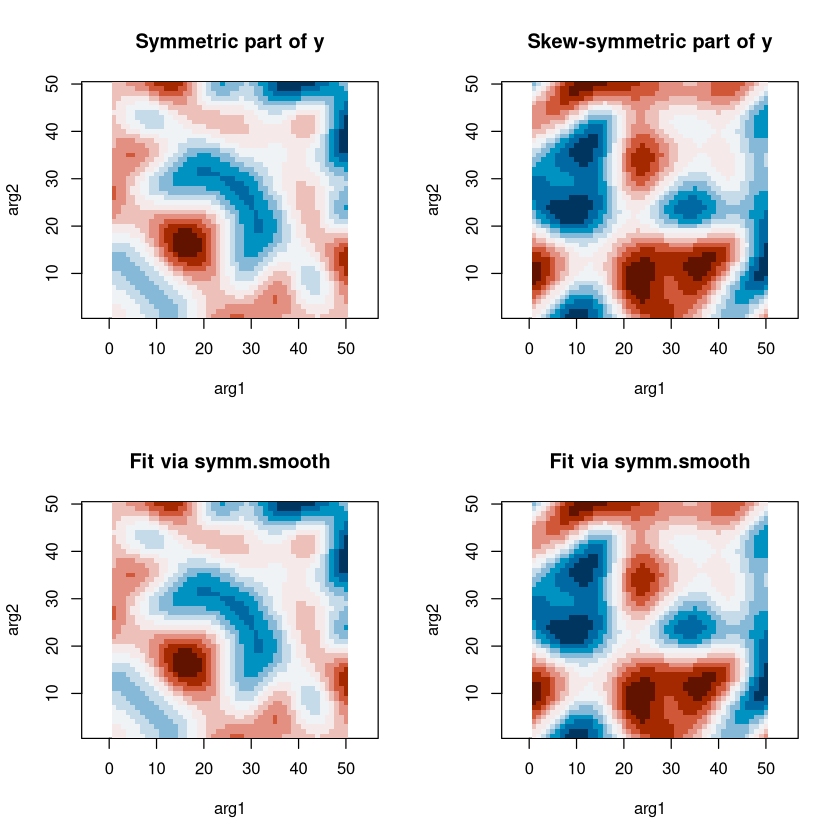

In [21]:
dat1 <- data.frame(arg1 = 1:50)
dat2 <- expand.grid(arg1 = 1:50, arg2 = 1:50)

Bskew <- Predict.matrix(
  smooth.construct( 
    s(arg1, arg2, bs = "symm", xt = list(skew = TRUE)),
    data = dat2, knots = NULL ),
  data = dat2 )
Bsymm <- Predict.matrix(
  smooth.construct( 
    s(arg1, arg2, bs = "symm", xt = list(skew = FALSE)),
    data = dat2, knots = NULL ),
  data = dat2 )

set.seed(934811)
dat2$yskew <- c(Bskew %*% rnorm(ncol(Bskew)))
dat2$ysymm <- c(Bsymm %*% rnorm(ncol(Bsymm)))

# fit sum of skew-symmetric and symmetric parts with corresponding smooths
modpa <- gam( I(yskew + ysymm) ~ s(arg1, arg2, bs = "symm", xt = list(skew = TRUE)) + 
                s(arg1, arg2, bs = "symm", xt = list(skew = FALSE)), data = dat2, outer.ok=TRUE)
# predict surfaces
preds <- predict(modpa, type = "terms")
dat1 <- as.list(dat1)
dat1$arg2 <- dat1$arg1
dat1$predskew <- matrix(preds[,1], nrow = length(dat1$arg1))
dat1$predsymm <- matrix(preds[,2], nrow = length(dat1$arg1))

cols <- hcl.colors(12, "RdBu")
opar <- par(mfcol = c(2,2))
# symm part (intercept missing)
with(dat1, image(arg1, arg2, predsymm, asp = 1,
                 main = "Symmetric part of y",
                 col = cols))
with(dat1, image(arg1, arg2, asp = 1, 
                 main = "Fit via symm.smooth",
                 matrix(dat2$ysymm, nrow = length(arg1)), 
                                    col = cols))
# skew-symm part
with(dat1, image(arg1, arg2, predskew, asp = 1,
                 main = "Skew-symmetric part of y",
                 col = cols))
with(dat1, image(arg1, arg2, asp = 1, 
                 main = "Fit via symm.smooth",
                 matrix(dat2$yskew, nrow = length(arg1)), 
                 col = cols))
par(opar)

stopifnot(all.equal(dat1$predskew, - t(dat1$predskew)))
stopifnot(all.equal(dat1$predsymm, t(dat1$predsymm)))